In [8]:
import pandas 
import plotly.express as px
import random
import streamlit as st

from datetime import datetime

from src.utils import show_country


In [24]:
data_afghanistan = {
    'Country': ['Afghanistan'],
    'Male 0-14 years': [7562703],
    'Male 15-24 years': [3960044],
    'Male 25-54 years': [5858675],
    'Male 55-64 years': [724597],
    'Male 65+ years': [451852],
    'Female 0-14 years': [7321646],
    'Female 15-24 years': [3828670],
    'Female 25-54 years': [5661887],
    'Female 55-64 years': [744910],
    'Female 65+ years': [528831]
}

df_afghanistan = pd.DataFrame(data_afghanistan)
df_afghanistan=df_afghanistan.melt(id_vars='Country')


# Dividir la columna 'variable' en 'sexe' y 'years'
df_afghanistan[['sexe', 'years','nada']] = df_afghanistan['variable'].str.split(' ', expand=True)
df_afghanistan=df_afghanistan.drop(columns=['nada','variable'])
# Mostrar el DataFrame resultante
print(df_afghanistan)


       Country    value    sexe  years
0  Afghanistan  7562703    Male   0-14
1  Afghanistan  3960044    Male  15-24
2  Afghanistan  5858675    Male  25-54
3  Afghanistan   724597    Male  55-64
4  Afghanistan   451852    Male    65+
5  Afghanistan  7321646  Female   0-14
6  Afghanistan  3828670  Female  15-24
7  Afghanistan  5661887  Female  25-54
8  Afghanistan   744910  Female  55-64
9  Afghanistan   528831  Female    65+


In [57]:
import plotly.graph_objects as go
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Country': ['Afghanistan'] * 8,
    'value': [7562703, 3960044, 5858675, 724597, 451852, 7321646, 3828670, 5661887],
    'sexe': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female'],
    'years': ['0-14', '15-24', '25-54', '55-64', '65+', '0-14', '15-24', '25-54']
}

df_Country = pd.DataFrame(data)

# Crear un gráfico de barras con Plotly
fig = go.Figure()

# Agregar barras para cada sexo
for sex in df_Country['sexe'].unique():
    data_sex = df_Country[df_Country['sexe'] == sex]
    fig.add_trace(go.Bar(
        x=data_sex['value'] if sex == 'Male' else -data_sex['value'],
        y=data_sex['years'],
        name=sex,
        orientation='h',
        marker=dict(color='blue' if sex == 'Male' else 'green')
    ))

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Pirámide Demográfica por Grupo de Edad y Género en Afghanistan',
    xaxis_title='Población',
    yaxis_title='Grupo de Edad',
    legend=dict(title='Sexo'),
    barmode='overlay',  # Sobreponer las barras
    bargap=0.1,         # Espacio entre las barras
)

# Mostrar el gráfico
fig.show()


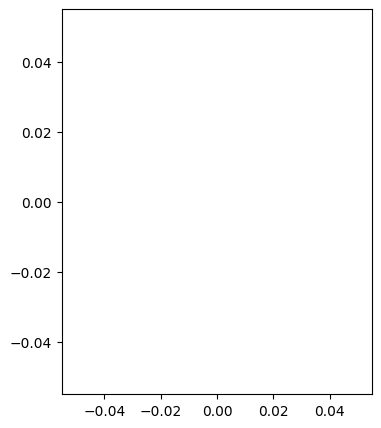

In [52]:
data_try= pandas.read_excel('data/country_data_palo.xlsx',3)
data_try= data_try[data_try.Country=='Spain']
data_try=data_try.melt(id_vars='Country')
data_try.loc[:, ['nada', 'years']] = data_try['variable'].str.split(' ', expand=True)[[0, 1]]

fig, ax = plt.subplots(figsize=(4, 5))
ax.barh(data_try['years'], data_try['value'],color='black')
ax.title.set_fontsize(10)



In [36]:
data_try

,Country,variable,value,nada,years
0,Afghanistan,Age: 0-4,82155,Age:,0-4
1,Albania,Age: 0-4,291,Age:,0-4
2,Algeria,Age: 0-4,21229,Age:,0-4
3,American Samoa,Age: 0-4,8,Age:,0-4
4,Andorra,Age: 0-4,3,Age:,0-4
...,...,...,...,...,...
4825,Vietnam,Age: 100+,2921,Age:,100+
4826,Wallis and Futuna,Age: 100+,1,Age:,100+
4827,Yemen,Age: 100+,7,Age:,100+
4828,Zambia,Age: 100+,30,Age:,100+


In [33]:
data_try= pandas.read_excel('data/country_data_palo.xlsx',3)
data_try

,Country,Age: 0-4,Age: 4-9,Age: 9-14,Age: 14-19,Age: 19-24,Age: 24-29,Age: 29-34,Age: 34-39,Age: 39-44,...,Age: 54-59,Age: 59-64,Age: 64-69,Age: 69-74,Age: 74-79,Age: 79-84,Age: 84-89,Age: 89-94,Age: 94-99,Age: 100+
0,Afghanistan,82155,7001,4867,10429,16270,14010,11013,9620,10044,...,14182,16234,17845,19037,17410,12594,6369,1847,322,34
1,Albania,291,30,40,76,97,125,161,227,308,...,1351,2074,2798,3828,5601,6224,4580,2395,772,121
2,Algeria,21229,1587,1230,1276,1557,1764,2350,3667,5238,...,10374,14535,19078,22169,22978,26060,20042,8881,1836,200
3,American Samoa,8,0,0,1,4,5,5,5,7,...,31,38,43,44,37,29,17,7,1,0
4,Andorra,3,0,0,0,0,0,0,3,7,...,39,49,58,73,83,83,86,73,31,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Vietnam,30705,6308,4424,7573,10503,13191,14677,16401,20488,...,39421,58324,72008,74457,72135,80488,76915,41799,14848,2921
226,Wallis and Futuna,1,0,0,0,0,0,0,0,0,...,5,8,10,13,13,14,9,5,1,1
227,Yemen,62554,4395,3013,5796,8959,9005,8149,7679,7480,...,10352,12021,13889,16422,16355,13202,7254,2242,291,7
228,Zambia,37909,3679,2570,3712,4639,5080,5742,6681,7309,...,7485,7604,7268,6845,5998,4428,2503,906,213,30


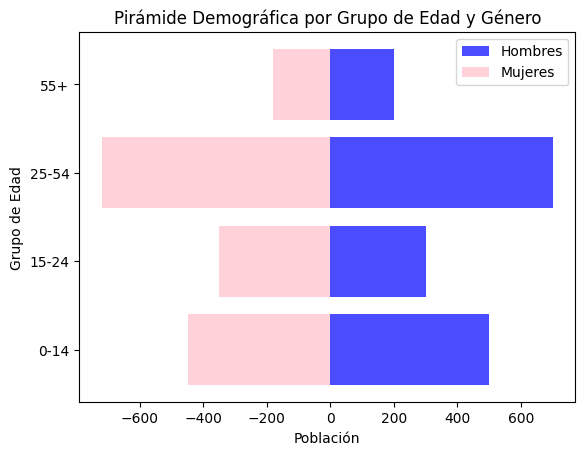

In [6]:
import matplotlib.pyplot as plt

# Datos ficticios de población por grupo de edad
edades = ['0-14', '15-24', '25-54', '55+']
poblacion_hombres = [500, 300, 700, 200]
poblacion_mujeres = [450, 350, 720, 180]

# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Barras horizontales para la población masculina y femenina
ax.barh(edades, poblacion_hombres, label='Hombres', color='blue', alpha=0.7)
ax.barh(edades, [-x for x in poblacion_mujeres], label='Mujeres', color='pink', alpha=0.7)  # Usar valores negativos para invertir la dirección

# Configurar etiquetas y título
ax.set_xlabel('Población')
ax.set_ylabel('Grupo de Edad')
ax.set_title('Pirámide Demográfica por Grupo de Edad y Género')
ax.legend()

# Mostrar el gráfico
plt.show()




In [170]:


# Create a list of random colors for each category


In [4]:
coord_df = pandas.read_csv('data/countries_coord_utf8.csv',sep=',')
coord_df['latitude']=coord_df['latitude'].str.replace(',','.').astype(float)
coord_df['longitude']=coord_df['longitude'].str.replace(',','.').astype(float)
replace_dic={ 
    'Congo [Republic]':'Republic of the Congo',
    'Netherlands Antilles':'Curaçao',#ERROR
    'Cocos [Keeling] Islands': 'Cocos (Keeling) Islands',
    'Congo [DRC]': 'Democratic Republic of the Congo',
    # 'Netherlands Antilles':'Saint Maarten',#ERROR
    # 'Netherlands Antilles':'Saint Barthélemy',#ERROR
    'Czech Republic':'Czechia',
    'French Southern Territories':'French South Antarctic Territory',
    'São Tomé and Príncipe':'Sao Tome and Principe',
    "Côte d'Ivoire":"Cote d'Ivoire",
    'Swaziland':'Eswatini',
    'Falkland Islands [Islas Malvinas]':'Falkland Islands',
    # 'Netherlands Antilles':'Bonaire',
    # 'Sudan':'South Sudan',
    'Palestinian Territories':'Palestine',
    'Myanmar [Burma]':'Burma',
    'Macedonia [FYROM]':'North Macedonia',
    }

non_match=['Saint Maarten', 'Saint Barthélemy', 'Bonaire', 'South Sudan', 'Other Asia']
for old_value, new_value in replace_dic.items():
    coord_df['name'] = coord_df['name'].str.replace(old_value, new_value, regex=False)

In [6]:
import pandas as pd
from geopy.distance import geodesic as GD
import math

# Supongamos que tienes un DataFrame llamado `coord_df` con las columnas 'name', 'latitude', y 'longitude'
# Crea un DataFrame vacío con las columnas que necesitas
result_df = pd.DataFrame(columns=['country1', 'country2', 'distance', 'direction'])

# Calcular las distancias y direcciones entre todos los países
for index1, row1 in coord_df.iterrows():
    country1 = row1["name"]
    lat1 = row1["latitude"]
    lon1 = row1["longitude"]
    for index2, row2 in coord_df.iterrows():
        country2 = row2["name"]
        lat2 = row2["latitude"]
        lon2 = row2["longitude"]
        
        if country1 == country2:
            distance = 0.0
            direction = "N/A"
        else:
            distance = GD((lat1, lon1), (lat2, lon2)).km
            
            lat1_rad = math.radians(lat1)
            lon1_rad = math.radians(lon1)
            lat2_rad = math.radians(lat2)
            lon2_rad = math.radians(lon2)
            
            dLon = lon2_rad - lon1_rad
            y = math.sin(dLon) * math.cos(lat2_rad)
            x = math.cos(lat1_rad) * math.sin(lat2_rad) - math.sin(lat1_rad) * math.cos(lat2_rad) * math.cos(dLon)
            bearing = math.degrees(math.atan2(y, x))
            
            if bearing < 0:
                bearing += 360
            
            if 22.5 <= bearing < 67.5:
                direction = "Northeast"
            elif 67.5 <= bearing < 112.5:
                direction = "East"
            elif 112.5 <= bearing < 157.5:
                direction = "Southeast"
            elif 157.5 <= bearing < 202.5:
                direction = "South"
            elif 202.5 <= bearing < 247.5:
                direction = "Southwest"
            elif 247.5 <= bearing < 292.5:
                direction = "West"
            elif 292.5 <= bearing < 337.5:
                direction = "Northwest"
            else:
                direction = "North"
        
        # Agregar los datos al DataFrame resultante
            result_df = pd.concat([result_df, pd.DataFrame({'country1': [country1], 'country2': [country2], 'distance': [round(distance, 1)], 'direction': [direction]})], ignore_index=True)




In [7]:

pivoted_df = result_df.pivot(index='country1', columns='country2', values='distance')
pivoted_df = pivoted_df.fillna(0)
pivoted_df_2 = result_df.pivot(index='country1', columns='country2', values='direction')
pivoted_df_2 = pivoted_df_2.fillna(0)


# Mostrar el DataFrame pivotado
pivoted_df.to_csv('countries_distances.csv')
pivoted_df_2.to_csv('countries_direction.csv')

In [81]:
countries_direction_df = pandas.read_csv('countries_direction.csv',index_col=0)
countries_distances_df = pandas.read_csv('countries_distances.csv',index_col=0)

In [59]:
tradle_df = pandas.read_csv('all_countries.csv')
tradle_df= tradle_df[['Section','HS4','Trade Value', 'country']]


In [ ]:
labels = ["Nivel 1", "Nivel 2", "Nivel 3"]
parents = ["", "Nivel 1", "Nivel 2"]
values = [10, 20, 30]

# Lista de URLs de imágenes correspondientes a cada etiqueta
image_urls = ["url_imagen_nivel_1", "url_imagen_nivel_2", "url_imagen_nivel_3"]

# Crear una figura de treemap personalizada
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=values,
    hovertemplate='<b>%{label}</b><br>%{value}<extra></extra>',
    customdata=image_urls,  # Asignar las URLs de imágenes como datos personalizados
))

# Configuración del diseño
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# Mostrar la figura
fig.show()


In [76]:

print([i for i in coord_df.name.unique() if i not in tradle_df.country.unique() ]  )

['Antarctica', 'Bouvet Island', 'Western Sahara', 'Faroe Islands', 'French Guiana', 'Guernsey', 'Guadeloupe', 'South Georgia and the South Sandwich Islands', 'Gaza Strip', 'Heard Island and McDonald Islands', 'Isle of Man', 'Jersey', 'Liechtenstein', 'Monaco', 'Martinique', 'Puerto Rico', 'Réunion', 'Svalbard and Jan Mayen', 'Taiwan', 'Vatican City', 'U.S. Virgin Islands', 'Kosovo', 'Mayotte']


In [77]:
print([i for i in tradle_df.country.unique() if i not in coord_df.name.unique() ]  )

['Saint Maarten', 'Saint Barthélemy', 'Bonaire', 'South Sudan', 'Other Asia']


In [ ]:


replace_dic={ 
    'Congo [Republic]':'Republic of the Congo',
    'Netherlands Antilles':'Curaçao',#ERROR
    'Cocos [Keeling] Islands': 'Cocos (Keeling) Islands',
    'Congo [DRC]': 'Democratic Republic of the Congo',
    # 'Netherlands Antilles':'Saint Maarten',#ERROR
    # 'Netherlands Antilles':'Saint Barthélemy',#ERROR
    'Czech Republic':'Czechia',
    'French Southern Territories':'French South Antarctic Territory',
    'São Tomé and Príncipe':'Sao Tome and Principe',
    "Côte d'Ivoire":"Cote d'Ivoire",
    'Swaziland':'Eswatini',
    'Falkland Islands [Islas Malvinas]':'Falkland Islands',:
    'Netherlands Antilles''Bonaire',
    # 'Sudan':'South Sudan',
    'Palestinian Territories':'Palestine',
    'Myanmar [Burma]':'Burma',
    'Macedonia [FYROM]':'North Macedonia',
    }





In [3]:
current_date = int(datetime.now().strftime("%Y%m%d"))

# Set the random seed to the current date
random.seed(current_date)
country_name= random.choice(tradle_df.country.unique())
print(country_name)

NameError: name 'tradle_df' is not defined

In [8]:
#Extrae nombre random
country_name= random.choice(tradle_df.country.unique())
show_country(country_name)
def show_country(country_name):
    df_country=tradle_df[tradle_df.country==country_name]

    fig = px.treemap(df_country, 
                    path=['Section','HS4'],  # Columna que define la jerarquía
                    values='Trade Value',  # Columna que define el tamaño en porcentajes
                    color='Section',  # Colores basados en la categoría 'Section'
                    color_discrete_map=color_dic,  # Mapeo de colores
                    title=str(round(df_country['Trade Value'].sum()/1e9,2)) +'B' if df_country['Trade Value'].sum()>1e9 else str(round(df_country['Trade Value'].sum()/1e6,2)) +'M',
                    labels={'Section': 'Categoría', 'HS4': 'Nombre de la Caja', 'Trade Value Percentage': 'Porcentaje del Valor Comercial'})


    fig.update_layout(
        width=1000,  # Ancho de la figura en píxeles
        height=400  # Alto de la figura en píxeles
    )
    return fig

In [10]:
#Extrae nombre random
country_name= random.choice(tradle_df.country.unique())
show_country(country_name)


In [5]:
tradle_df.country.unique().sort()


In [478]:
grouped_df = tradle_df.groupby('country')['Trade Value'].sum()

# Calcular el título según la condición
grouped_df['title_format'] = grouped_df.apply(lambda x: str(round(x / 1e9, 2)) + 'B' if x > 1e9 else str(round(x / 1e6, 2)) + 'M')
result = tradle_df.groupby('country').apply(lambda x: x.loc[x['Trade Value'].idxmax()]['HS4'])


In [232]:
result_df = result.reset_index()
result_df.columns = ['country' ,'HS4']

title_df = grouped_df.reset_index()
title_df.columns = ['country' ,'value']

# Combinar los DataFrames result_df y title_df por la columna 'country'
merged_df = result_df.merge(title_df, on='country')
merged_df['value_format']= merged_df['value'].apply(lambda x: str(round(x / 1e9, 2)) + 'B' if x > 1e9 else str(round(x / 1e6, 2)) + 'M')
juice_info=merged_df.sort_values(by=['value'],ascending=False).reset_index()[["country","HS4","value_format"]]



In [525]:
import time

from IPython.display import display, clear_output


for tipe in juice_info['HS4'].unique():
    a_df=juice_info[juice_info['HS4']==tipe].reset_index(drop=True)
    display(a_df)
    # if len(a_df)>4:
    #     time.sleep(10)
    #     clear_output()



,country,HS4,value_format
0,China,Broadcasting Equipment,3337.97B
1,Vietnam,Broadcasting Equipment,355.57B
2,Estonia,Broadcasting Equipment,21.9B
3,Saint Kitts and Nevis,Broadcasting Equipment,63.59M


,country,HS4,value_format
0,United States,Refined Petroleum,1628.14B
1,Netherlands,Refined Petroleum,642.38B
2,India,Refined Petroleum,403.07B
3,Finland,Refined Petroleum,83.08B
4,Greece,Refined Petroleum,82.04B
5,Egypt,Refined Petroleum,44.51B
6,Lithuania,Refined Petroleum,40.81B
7,Croatia,Refined Petroleum,22.81B
8,Bahrain,Refined Petroleum,14.99B
9,Brunei,Refined Petroleum,11.32B


,country,HS4,value_format
0,Germany,Cars,1563.45B
1,Japan,Cars,731.33B
2,Mexico,Cars,473.57B
3,United Kingdom,Cars,420.17B
4,Spain,Cars,372.47B
5,Turkey,Cars,233.58B
6,Czechia,Cars,224.55B
7,Sweden,Cars,184.79B
8,Hungary,Cars,137.41B
9,Slovakia,Cars,104.47B


,country,HS4,value_format
0,South Korea,Integrated Circuits,653.16B
1,Other Asia,Integrated Circuits,478.27B
2,Singapore,Integrated Circuits,350.77B
3,Malaysia,Integrated Circuits,333.49B
4,Philippines,Integrated Circuits,93.71B
5,Malta,Integrated Circuits,5.04B
6,Andorra,Integrated Circuits,110.43M
7,Cocos (Keeling) Islands,Integrated Circuits,8.54M
8,Pitcairn Islands,Integrated Circuits,6.29M
9,Wallis and Futuna,Integrated Circuits,0.46M


,country,HS4,value_format
0,Italy,Packaged Medicaments,596.89B
1,Denmark,Packaged Medicaments,119.7B
2,Slovenia,Packaged Medicaments,46.73B
3,Anguilla,Packaged Medicaments,30.47M


,country,HS4,value_format
0,France,"Planes, Helicopters, and/or Spacecraft",568.6B
1,British Virgin Islands,"Planes, Helicopters, and/or Spacecraft",253.42M


,country,HS4,value_format
0,Canada,Crude Petroleum,483.77B
1,Russia,Crude Petroleum,483.56B
2,United Arab Emirates,Crude Petroleum,295.56B
3,Saudi Arabia,Crude Petroleum,255.98B
4,Iraq,Crude Petroleum,81.11B
5,Kuwait,Crude Petroleum,58.18B
6,Nigeria,Crude Petroleum,57.71B
7,Oman,Crude Petroleum,56.88B
8,Kazakhstan,Crude Petroleum,53.6B
9,Colombia,Crude Petroleum,42.53B


,country,HS4,value_format
0,Belgium,"Vaccines, blood, antisera, toxins and cultures",402.99B
1,Ireland,"Vaccines, blood, antisera, toxins and cultures",212.18B
2,Austria,"Vaccines, blood, antisera, toxins and cultures",197.9B


,country,HS4,value_format
0,Switzerland,Gold,370.7B
1,Hong Kong,Gold,124.33B
2,Uzbekistan,Gold,14.68B
3,Ghana,Gold,14.08B
4,Dominican Republic,Gold,12.87B
5,Bolivia,Gold,11.33B
6,Guinea,Gold,9.49B
7,Mali,Gold,9.38B
8,Burkina Faso,Gold,9.04B
9,Tanzania,Gold,8.56B


,country,HS4,value_format
0,Australia,Iron Ore,343.13B
1,Brazil,Iron Ore,288.38B
2,Ukraine,Iron Ore,69.13B
3,Mauritania,Iron Ore,4.14B


,country,HS4,value_format
0,Poland,Motor vehicles; parts and accessories (8701 to...,322.83B
1,Romania,Motor vehicles; parts and accessories (8701 to...,90.78B


,country,HS4,value_format
0,Thailand,Office Machine Parts,284.99B


,country,HS4,value_format
0,Indonesia,Coal Briquettes,247.62B
1,Mozambique,Coal Briquettes,8.5B


,country,HS4,value_format
0,Norway,Petroleum Gas,163.81B
1,Qatar,Petroleum Gas,94.71B
2,Algeria,Petroleum Gas,35.39B
3,Burma,Petroleum Gas,20.37B
4,Papua New Guinea,Petroleum Gas,10.97B
5,Turkmenistan,Petroleum Gas,7.2B
6,Tonga,Petroleum Gas,14.8M


,country,HS4,value_format
0,South Africa,Platinum,143.46B


,country,HS4,value_format
0,Chile,Copper Ore,96.08B
1,Peru,Copper Ore,56.61B
2,Mongolia,Copper Ore,10.46B
3,Panama,Copper Ore,6.77B
4,Georgia,Copper Ore,5.02B
5,Armenia,Copper Ore,3.36B
6,Montenegro,Copper Ore,828.31M


,country,HS4,value_format
0,Argentina,Corn,68.65B


,country,HS4,value_format
0,New Zealand,Concentrated Milk,68.39B


,country,HS4,value_format
0,Israel,Diamonds,64.08B
1,Botswana,Diamonds,7.66B
2,Namibia,Diamonds,4.72B
3,Lesotho,Diamonds,1.07B


,country,HS4,value_format
0,Bangladesh,Knit T-shirts,51.77B
1,El Salvador,Knit T-shirts,6.86B
2,Haiti,Knit T-shirts,1.36B


,country,HS4,value_format
0,Bulgaria,Refined Copper,43.28B
1,Democratic Republic of the Congo,Refined Copper,16.72B
2,Republic of the Congo,Refined Copper,6.74B


,country,HS4,value_format
0,Belarus,Potassic Fertilizers,34.63B
1,Jordan,Potassic Fertilizers,12.05B


,country,HS4,value_format
0,Pakistan,House Linens,32.75B


,country,HS4,value_format
0,Cambodia,Knit Sweaters,27.26B


,country,HS4,value_format
0,Serbia,Insulated Wire,26.84B
1,Tunisia,Insulated Wire,18.82B
2,Moldova,Insulated Wire,3.89B


,country,HS4,value_format
0,Latvia,Sawn Wood,19.98B


,country,HS4,value_format
0,Luxembourg,Iron Blocks,19.42B


,country,HS4,value_format
0,Costa Rica,Medical Instruments,16.16B
1,Dominica,Medical Instruments,30.86M


,country,HS4,value_format
0,Guatemala,Bananas,14.18B


,country,HS4,value_format
0,Sri Lanka,Tea,14.09B
1,Kenya,Tea,7.15B


,country,HS4,value_format
0,Iran,Ethylene Polymers,14.0B


,country,HS4,value_format
0,Zambia,Raw Copper,13.39B


,country,HS4,value_format
0,Cote d'Ivoire,Cocoa Beans,12.4B
1,Sao Tome and Principe,Cocoa Beans,39.26M


,country,HS4,value_format
0,Paraguay,Soybeans,10.77B


,country,HS4,value_format
0,Uruguay,Frozen Bovine Meat,10.63B


,country,HS4,value_format
0,Trinidad and Tobago,Ammonia,9.86B


,country,HS4,value_format
0,Bosnia and Herzegovina,Electricity,9.57B
1,Laos,Electricity,9.22B


,country,HS4,value_format
0,Honduras,Coffee,9.22B
1,Ethiopia,Coffee,4.41B


,country,HS4,value_format
0,North Macedonia,Reaction and Catalytic Products,8.62B


,country,HS4,value_format
0,Iceland,Raw Aluminium,6.76B


,country,HS4,value_format
0,Cyprus,Passenger and Cargo Ships,5.16B
1,Marshall Islands,Passenger and Cargo Ships,1.37B
2,Niue,Passenger and Cargo Ships,5.68M


,country,HS4,value_format
0,Albania,Footwear Parts,3.49B


,country,HS4,value_format
0,Madagascar,Vanilla,3.22B


,country,HS4,value_format
0,Venezuela,Scrap Iron,3.2B
1,Guam,Scrap Iron,23.59M
2,Northern Mariana Islands,Scrap Iron,3.16M


,country,HS4,value_format
0,Eswatini,Scented Mixtures,2.51B


,country,HS4,value_format
0,Cayman Islands,Recreational Boats,2.43B
1,Seychelles,Recreational Boats,2.2B
2,Bermuda,Recreational Boats,234.8M
3,Saint Vincent and the Grenadines,Recreational Boats,121.7M


,country,HS4,value_format
0,Mauritius,Processed Fish,2.26B
1,Cape Verde,Processed Fish,123.15M


,country,HS4,value_format
0,New Caledonia,Ferroalloys,1.92B
1,Bhutan,Ferroalloys,344.74M


,country,HS4,value_format
0,Macau,Jewellery,1.76B


,country,HS4,value_format
0,Nepal,Soybean Oil,1.74B


,country,HS4,value_format
0,Jamaica,Aluminium Oxide,1.55B


,country,HS4,value_format
0,Palestine,Building Stone,1.45B


,country,HS4,value_format
0,Greenland,Crustaceans,1.39B


,country,HS4,value_format
0,Cuba,Rolled Tobacco,1.09B


,country,HS4,value_format
0,Fiji,Water,1.08B


,country,HS4,value_format
0,Syria,Pure Olive Oil,1.01B


,country,HS4,value_format
0,Malawi,Raw Tobacco,947.22M


,country,HS4,value_format
0,Sierra Leone,Titanium Ore,874.43M


,country,HS4,value_format
0,Eritrea,Zinc Ore,619.99M


,country,HS4,value_format
0,Somalia,Sheep and Goats,482.41M


,country,HS4,value_format
0,Solomon Islands,Rough Wood,479.5M


,country,HS4,value_format
0,Belize,Raw Sugar,411.13M


,country,HS4,value_format
0,Barbados,Hard Liquor,357.25M


,country,HS4,value_format
0,Djibouti,Palm Oil,329.96M


,country,HS4,value_format
0,Falkland Islands,Molluscs,307.5M
1,Turks and Caicos Islands,Molluscs,7.81M


,country,HS4,value_format
0,Vanuatu,Non-fillet Frozen Fish,270.23M
1,Maldives,Non-fillet Frozen Fish,238.49M
2,Nauru,Non-fillet Frozen Fish,186.96M
3,Micronesia,Non-fillet Frozen Fish,179.45M
4,Kiribati,Non-fillet Frozen Fish,94.52M
5,Saint Helena,Non-fillet Frozen Fish,37.47M
6,Cook Islands,Non-fillet Frozen Fish,31.4M
7,French South Antarctic Territory,Non-fillet Frozen Fish,11.54M
8,British Indian Ocean Territory,Non-fillet Frozen Fish,4.01M


,country,HS4,value_format
0,San Marino,Washing and Bottling Machines,221.52M


,country,HS4,value_format
0,Guinea-Bissau,"Coconuts, Brazil Nuts, and Cashews",172.31M
1,Gambia,"Coconuts, Brazil Nuts, and Cashews",152.7M


,country,HS4,value_format
0,French Polynesia,Paintings,161.59M


,country,HS4,value_format
0,Tuvalu,Tug Boats,128.54M


,country,HS4,value_format
0,Comoros,Cloves,60.82M


,country,HS4,value_format
0,Samoa,Coconut Oil,58.08M


,country,HS4,value_format
0,Grenada,"Nutmeg, mace and cardamons",29.92M


,country,HS4,value_format
0,Tokelau,Other Glass Articles,23.89M


,country,HS4,value_format
0,Christmas Island,Calcium Phosphates,13.4M


,country,HS4,value_format
0,Montserrat,Semi-Finished Iron,11.95M


,country,HS4,value_format
0,Saint Pierre and Miquelon,Processed Crustaceans,8.87M


,country,HS4,value_format
0,Palau,Computers,5.31M


,country,HS4,value_format
0,Saint Barthélemy,Wine,4.25M


,country,HS4,value_format
0,Norfolk Island,Sowing Seeds,1.98M


In [549]:
for country in ["Serbia"]:
    show_country(country)